# Linear Least-Squares Regression of a Nonlinear Model <br/> CH EN 2450 - Numerical Methods
#### Prof. Tony Saad <br/> Department of Chemical Engineering <br/> University of Utah

Chemical reacting systems consist of different substances reacting with each other. These reactants have different reaction rates. A reaction rate is the speed at which reactants are converted into products. A popular model for the reaction rate is known as the Arrhenius reaction rate model given by
\begin{equation}
k(T) = A e^{-\frac{E_\text{a}}{RT}}
\label{eq:arrhenius}
\end{equation}
where $k$ is known as the reaction rate constant, $T$ is the absolute temperature (in Kelvin), $A$ is the pre-exponential factor and is a measure of the frequency of molecular collisions, $E_\text{a}$ is the activation energy or the energy required to get the reaction started, and $R$ is the universal gas constant.

We can typically measure $k$ for a given temperature and chemical reaction. Our goal is to find $A$ and $E_\text{a}$ given those data.

|T (K)| k (1/s) |
|:-------:|:-------:|
|313|0.00043|
|319|0.00103|
|323|0.00180|
|328|0.00355|
|333|0.00717|

First, let's get some boiler plate out of the way

In [8]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

Now input the data from the table into numpy arrays

In [9]:
R=8.314
T=np.array([313,
319,
323,
328,
333])
k=np.array([0.00043,
0.00103,
0.00180,
0.00355,
0.00717])

As usual, you should generate a plot to get an idea of how the data looks like

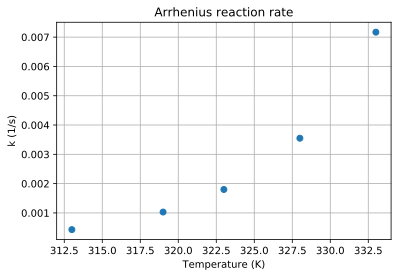

In [10]:
plt.plot(T,k,'o')
plt.xlabel('Temperature (K)')
plt.ylabel('k (1/s)')
plt.title('Arrhenius reaction rate')
plt.grid()

The data do indeed look like they follow an exponential trend. We will use linear regression now to fit this model. We will first take the logarithm of the Arrhenius equation
\begin{equation}
\ln k = \ln A + - \frac{1}{RT} E_\text{a}
\end{equation}
where we will choose our new y-values as $y_\text{new} = \ln (k)$ and the new x-values as $x_\text{new} = - \frac{1}{RT}$. We will also call $a_0 = \ln{A}$ and $a_1=E_\text{a}$ so that our new model fit is
\begin{equation}
y_\text{new} = a_0 + a_1 x_\text{new}
\end{equation}

To program this, we will first create arrays for $y_\text{new}$ and $x_\text{new}$

In [23]:
ynew = np.log(k)
xnew = -1.0/R/T

Let's plot the transformed data to see how they look like

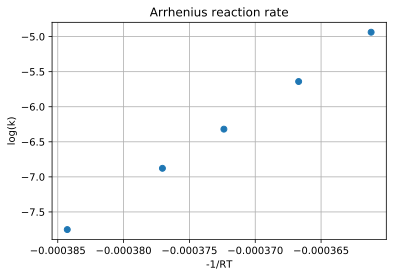

In [28]:
plt.plot(xnew,ynew,'o')
plt.xlabel('-1/RT')
plt.ylabel('log(k)')
plt.title('Arrhenius reaction rate')
plt.grid()

Next, we formulate the normal equations and solve them!

In [30]:
N = len(ynew)
A = np.array([np.ones(N), xnew]).T
ATA = A.T @ A
coefs = np.linalg.solve(ATA, A.T @ ynew)
print(coefs)

[3.89245804e+01 1.21481509e+05]


sol contains the coefficients of the straight line fit. We can untangle that using `poly1d`

In [38]:
p = np.poly1d(np.flip(coefs,0)) # must reverse array for poly1d to work

Finally, we can plot the fit over the transformed data

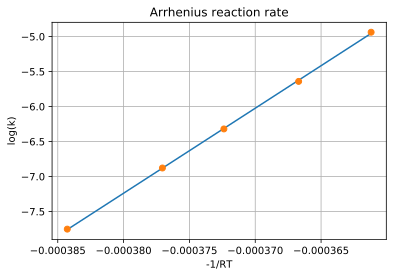

In [39]:
plt.plot(xnew, p(xnew), label='best fit')
plt.plot(xnew, ynew, 'o', label='original data')
plt.xlabel('-1/RT')
plt.ylabel('log(k)')
plt.title('Arrhenius reaction rate')
plt.grid()

we can also calculate the $R^2$ value. Recall that the $R^2$ value can be computed as:
\begin{equation}R^2 = 1 - \frac{\sum{(y_i - f_i)^2}}{\sum{(y_i - \bar{y})^2}}\end{equation}
where
\begin{equation}
\bar{y} = \frac{1}{N}\sum{y_i}
\end{equation}

In [41]:
ybar = np.average(ynew)
fnew = p(xnew)
rsq = 1 - np.sum( (ynew - fnew)**2 )/np.sum( (ynew - ybar)**2 )
print(rsq)

0.9998570770329075


This is an unbelievable fit! but it is correct since the data was actually setup to produce such a high R2 value.

Now we need to compute the original coefficients of the model, $A$ and $E_\text{a}$. This can be done by inverting the original transfomration
\begin{equation}
A = e^{a_0}
\end{equation}
and
\begin{equation}
E_\text{a} = a_1
\end{equation}

In [47]:
a0 = coefs[0]
a1 = coefs[1]
A = np.exp(a0)
Ea = a1

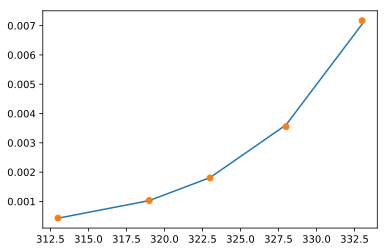

In [50]:
plt.plot(T, A * np.exp(-Ea/R/T), T, k, 'o')